In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df= pd.read_csv(r"C:\Users\osaze\OneDrive\Desktop\MySQL\Projects\Datasets\netflix_data.csv")
df.head()

,qq,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,1-Jul-17,2016,1,A genetics professor experiments with a treatm...,International TV


In [141]:
df.isnull().sum()

qq              0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

In [142]:
df.dtypes

qq              object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
duration         int64
description     object
genre           object
dtype: object

In [147]:
df['date_added']= pd.to_datetime(df['date_added'], dayfirst=True, errors= 'coerce')
print(df['date_added'].dtype)

datetime64[ns]


In [124]:
df['country'].unique()

array(['Mexico', 'Singapore', 'United States', 'Turkey', 'Egypt', 'India',
       'Thailand', 'Nigeria', 'Norway', 'South Korea', 'Italy',
       'Indonesia', 'Canada', 'Romania', 'Spain', 'Iceland',
       'South Africa', 'France', 'Portugal', 'Hong Kong',
       'United Kingdom', 'Argentina', 'Germany', 'Denmark', 'Poland',
       'Japan', 'Kenya', 'New Zealand', 'Pakistan', 'Australia', 'China',
       'Taiwan', 'Netherlands', 'Philippines', 'United Arab', 'Brazil',
       'Iran', 'Israel', 'Uruguay', 'Bulgaria', 'Soviet Union',
       'Malaysia', 'Ireland', 'Serbia', 'Colombia', 'Peru', 'Chile',
       'Sweden', 'Ghana', 'Saudi Arabia', 'Namibia', 'Lebanon', 'Belgium',
       'Vietnam', 'Russia', 'Kuwait', 'Zimbabwe', 'Hungary', 'Finland',
       'Venezuela', 'Cambodia', 'Slovenia', 'Switzerland', 'Austria',
       'Bangladesh', 'Czech Republic', 'Georgia', 'Guatemala', 'Jamaica',
       'Paraguay', 'Somalia', 'Croatia'], dtype=object)

In [148]:
df[df.duplicated()]

,qq,type,title,director,cast,country,date_added,release_year,duration,description,genre


In [149]:
df['genre'].unique()

array(['Dramas', 'Horror Movies', 'Action', 'International TV',
       'Documentaries', 'Independent Movies', 'Comedies', 'Sci-Fi',
       'International Movies', 'Children', 'TV Shows', 'Uncategorized',
       'Classic Movies', 'Thrillers', 'Stand-Up', 'Anime Features',
       'Music', 'Anime Series', 'Kids', 'Docuseries', 'Crime TV',
       'British TV', 'Cult Movies', 'TV Action', 'Romantic TV',
       'TV Horror', 'Romantic Movies', 'TV Comedies', 'Classic',
       'Reality TV', 'LGBTQ Movies'], dtype=object)

SyntaxError: invalid character '→' (U+2192) (2697641036.py, line 2)

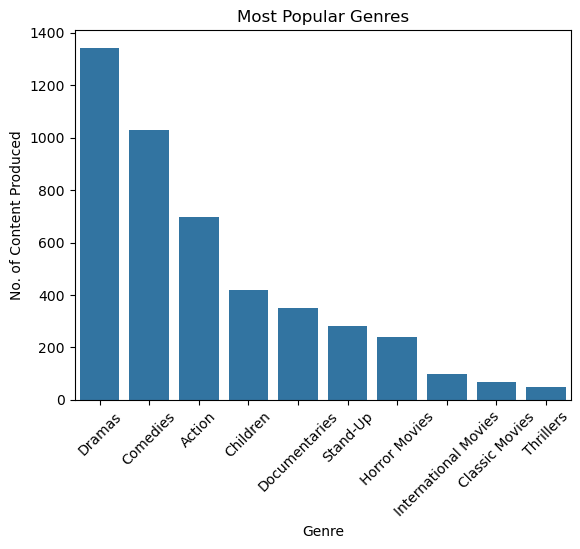

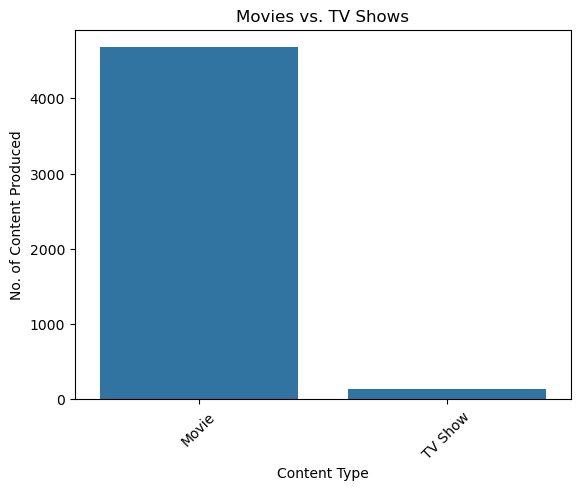

In [150]:
##"What genres are most popular over time?"
#Trend of content types (Movies vs. TV Shows), genres, or target demographics across years.
#Dramas and Movies are the most popular genre and type

top_genres= df['genre'].value_counts().head(10)
top_genres

top_type= df['type'].value_counts()
top_type

#visualization of most popular genres
sns.barplot(data= top_genres)
plt.xticks(rotation=45, size=10)
plt.title('Most Popular Genres')
plt.xlabel('Genre')
plt.ylabel('No. of Content Produced')
plt.show()

#comparison by type
sns.barplot(data= top_type)
plt.xticks(rotation=45, size=10)
plt.title('Movies vs. TV Shows')
plt.xlabel('Content Type')
plt.ylabel('No. of Content Produced')
plt.show()

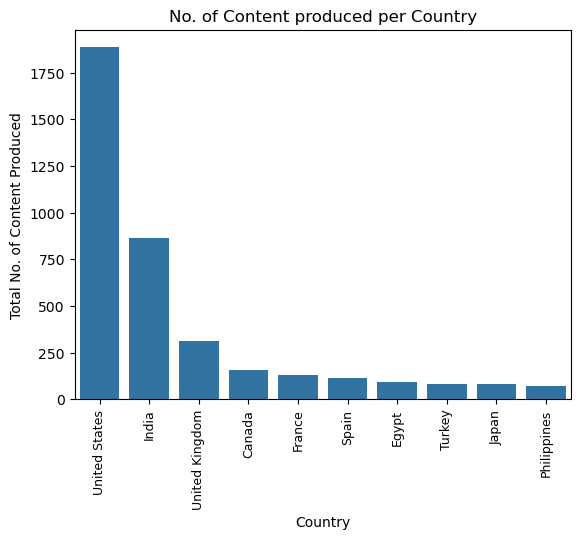

In [151]:
#"Which countries contribute the most content to Netflix's library?"
# Helpful for expansion decisions and content acquisition strategies.

top_country= df['country'].value_counts().head(10)
top_country


sns.barplot(data= top_country)
plt.xticks(rotation=90, size =9)
plt.title('No. of Content produced per Country')
plt.xlabel('Country')
plt.ylabel('Total No. of Content Produced')
plt.show()

In [152]:
africa= ['Egypt', 'Nigeria', 'South Africa', 'Ghana', 'Zimbabwe', 'Kenya', 'Namibia', 'Somalia']
africa

top_african_country= df[df['country'].isin(africa)]['country'].value_counts()
top_african_country

country
Egypt           91
Nigeria         65
South Africa    29
Ghana            4
Kenya            3
Namibia          1
Zimbabwe         1
Somalia          1
Name: count, dtype: int64

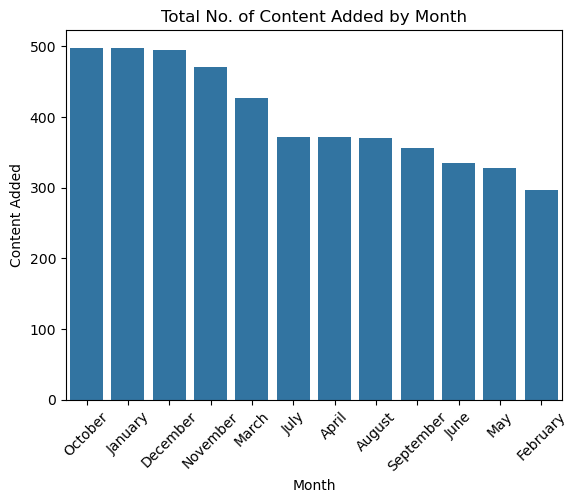

In [162]:
##"What months or years saw spikes in content additions?"
#→ Useful for understanding Netflix’s content calendar or production schedules.
month_map = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df['date_added']
df['month']= df['date_added'].dt.month.map(month_map)
df['month'].unique()


month_spikes= df['month'].value_counts().sort_values(ascending=False)

month_spikes

sns.barplot(data=month_spikes)
plt.title('Total No. of Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Content Added')
plt.xticks(rotation= 45)
plt.show()

#year_spikes= df['date_added'].dt.year.value_counts().sort_values(ascending=False)
#year_spikes

In [173]:
##"What’s the average duration of movies vs. TV shows? Are there outliers?"
#→ Could reveal content shifts (e.g., move toward miniseries or longer-format shows).

avg_duration= df.groupby(['type'])['duration'].mean()
avg_duration

df[(df['type']== 'TV Show') & (df['country']== 'United States')]

,qq,type,title,director,cast,country,date_added,release_year,duration,description,genre,month
197,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...",United States,2020-07-01,2019,1,A big-hearted girl helps her Fuzzly friends wh...,Kids,July
398,s579,TV Show,Ari Shaffir: Double Negative,Eric Abrams,Ari Shaffir,United States,2017-07-18,2017,1,"Wry yet thoughtful, comedian Ari Shaffir bring...",Stand-Up,July
403,s585,TV Show,Arrow,James Bamford,"Stephen Amell, Katie Cassidy, David Ramsey, Wi...",United States,2020-02-05,2019,8,"Based on DC Comics' Green Arrow, an affluent p...",Crime TV,February
722,s1080,TV Show,Brave Miss World,Cecilia Peck,Linor Abargil,United States,2018-02-17,2013,1,"Weeks before being named Miss World, Linor Aba...",Crime TV,February
945,s1471,TV Show,Comedians in Cars Getting Coffee,Jerry Seinfeld,Jerry Seinfeld,United States,2019-07-19,2019,6,Jerry Seinfeld's roving talk show combines cof...,Stand-Up,July
1032,s1630,TV Show,Dave Chappelle,Stan Lathan,Dave Chappelle,United States,2017-03-21,2017,1,Comedy icon Dave Chappelle makes his triumphan...,Stand-Up,March
1033,s1631,TV Show,Dave Chappelle: Equanimity & The Bird Revelation,Stan Lathan,Dave Chappelle,United States,2017-12-31,2017,1,Comedy titan Dave Chappelle caps a wild year w...,Stand-Up,December
1042,s1648,TV Show,DC's Legends of Tomorrow,Rob Seidenglanz,"Victor Garber, Brandon Routh, Caity Lotz, Fran...",United States,2020-06-10,2020,5,"A mysterious ""time master"" from the future uni...",TV Action,June
1255,s1982,TV Show,Ellen DeGeneres: Relatable,"Joel Gallen, Tig Notaro",Ellen DeGeneres,United States,2018-12-18,2018,1,"In her first special since 2003, Ellen revisit...",Stand-Up,December
1382,s2197,TV Show,Five Came Back,Laurent Bouzereau,"Steven Spielberg, Guillermo del Toro, Lawrence...",United States,2017-03-31,2017,1,Five acclaimed contemporary directors tell the...,Docuseries,March


In [195]:
##"Which actors/directors are most frequently featured?"
#→ Influencer power: who’s drawing attention based on volume.

top_directors= df.groupby(['director','country']).size().reset_index(name= 'Content Count').sort_values(by='Content Count', ascending=False).head(10)
#['director']
top_directors



,director,country,Content Count
2122,Marcus Raboy,United States,15
1473,Jay Karas,United States,14
570,Cathy Garcia-Molina,Philippines,13
1470,Jay Chapman,United States,12
3313,Steven Spielberg,United States,10
2184,Martin Scorsese,United States,10
806,David Dhawan,India,9
2828,"Raúl Campos, Jan Suter",Mexico,9
3687,Youssef Chahine,Egypt,9
1238,Hakan Algül,Turkey,8
